In [114]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import accuracy_score, make_scorer
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import roc_curve, auc, confusion_matrix, roc_auc_score

## Cleaning

Clean data. Nothing much to filter.

In [115]:
skyObj = pd.read_csv('D:/SDSU/CS649_Project/Skyserver_SQL4_7_2022 12_58_52 AM.csv',skiprows=1, index_col='objid')
skyObj = skyObj.sort_index()

In [116]:
skyObj.head()

,ra,dec,u,g,r,i,z,run,rerun,camcol,...,modelFlux_g,modelFlux_r,modelFlux_i,modelFlux_z,specobjid,class,redshift,plate,mjd,fiberid
objid,,,,,,,,,,,,,,,,,,,,,
1.237650e+18,232.599355,-0.338963,19.00423,16.77978,15.78668,15.31252,14.92504,752,301,3,...,194.12860,484.53990,749.8780,1071.4800,4.087630e+17,GALAXY,0.070957,363,51989,224
1.237650e+18,335.122597,12.189079,19.25452,18.21714,17.73826,17.37833,17.24885,1739,301,1,...,51.65858,80.29637,111.8577,126.0212,8.286650e+17,GALAXY,0.124113,736,52221,9
1.237650e+18,335.049940,12.079281,19.11886,18.11232,17.60778,17.20081,17.10747,1739,301,1,...,56.89438,90.55006,131.7273,143.5486,8.286680e+17,GALAXY,0.079498,736,52221,19
1.237650e+18,334.505900,12.006364,17.79247,16.65809,16.22427,15.88969,15.71684,1739,301,1,...,217.15150,323.81100,440.6808,516.7272,8.286890e+17,GALAXY,0.065516,736,52221,96
1.237650e+18,334.587293,12.126135,18.98048,17.93086,17.53560,17.38974,17.29787,1739,301,1,...,67.24416,96.77428,110.6888,120.4576,8.286740e+17,STAR,-0.000661,736,52221,43


In [117]:
skyObj.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 500000 entries, 1.23765e+18 to 1.23767e+18
Data columns (total 22 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   ra           500000 non-null  float64
 1   dec          500000 non-null  float64
 2   u            500000 non-null  float64
 3   g            500000 non-null  float64
 4   r            500000 non-null  float64
 5   i            500000 non-null  float64
 6   z            500000 non-null  float64
 7   run          500000 non-null  int64  
 8   rerun        500000 non-null  int64  
 9   camcol       500000 non-null  int64  
 10  field        500000 non-null  int64  
 11  modelFlux_u  500000 non-null  float64
 12  modelFlux_g  500000 non-null  float64
 13  modelFlux_r  500000 non-null  float64
 14  modelFlux_i  500000 non-null  float64
 15  modelFlux_z  500000 non-null  float64
 16  specobjid    500000 non-null  float64
 17  class        500000 non-null  object 
 18  redshif

In [118]:
skyObj.isna().any()

ra             False
dec            False
u              False
g              False
r              False
i              False
z              False
run            False
rerun          False
camcol         False
field          False
modelFlux_u    False
modelFlux_g    False
modelFlux_r    False
modelFlux_i    False
modelFlux_z    False
specobjid      False
class          False
redshift       False
plate          False
mjd            False
fiberid        False
dtype: bool

In [119]:
skyObjData = skyObj[['ra','dec','u','g','r','i','z','run', 'rerun', 'camcol', 'field','modelFlux_u','modelFlux_g','modelFlux_r','modelFlux_i','modelFlux_z','redshift','plate','mjd','class']]

In [120]:
skyObjData

,ra,dec,u,g,r,i,z,run,rerun,camcol,field,modelFlux_u,modelFlux_g,modelFlux_r,modelFlux_i,modelFlux_z,redshift,plate,mjd,class
objid,,,,,,,,,,,,,,,,,,,,
1.237650e+18,232.599355,-0.338963,19.00423,16.77978,15.78668,15.31252,14.92504,752,301,3,595,25.02035,194.12860,484.53990,749.87800,1071.48000,0.070957,363,51989,GALAXY
1.237650e+18,335.122597,12.189079,19.25452,18.21714,17.73826,17.37833,17.24885,1739,301,1,140,19.86872,51.65858,80.29637,111.85770,126.02120,0.124113,736,52221,GALAXY
1.237650e+18,335.049940,12.079281,19.11886,18.11232,17.60778,17.20081,17.10747,1739,301,1,139,22.51334,56.89438,90.55006,131.72730,143.54860,0.079498,736,52221,GALAXY
1.237650e+18,334.505900,12.006364,17.79247,16.65809,16.22427,15.88969,15.71684,1739,301,1,136,76.38525,217.15150,323.81100,440.68080,516.72720,0.065516,736,52221,GALAXY
1.237650e+18,334.587293,12.126135,18.98048,17.93086,17.53560,17.38974,17.29787,1739,301,1,136,25.57370,67.24416,96.77428,110.68880,120.45760,-0.000661,736,52221,STAR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1.237670e+18,200.215628,31.366615,16.67355,15.51600,14.96428,14.68046,14.38708,4623,301,3,257,214.08140,621.72500,1033.44600,1342.19700,1758.60000,0.016838,2104,53852,GALAXY
1.237670e+18,200.231118,31.264855,18.58574,17.83990,17.67802,17.62408,17.48490,4623,301,3,257,36.78742,73.12035,84.87688,89.20048,101.39520,0.018164,2104,53852,GALAXY
1.237670e+18,206.335322,30.305368,18.86878,17.03111,16.33482,15.95437,15.80770,4623,301,3,293,28.34514,154.01200,292.46340,415.19320,475.24770,0.120928,2094,53851,GALAXY


In [121]:
skyObjData.describe()

,ra,dec,u,g,r,i,z,run,rerun,camcol,field,modelFlux_u,modelFlux_g,modelFlux_r,modelFlux_i,modelFlux_z,redshift,plate,mjd
count,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.0,500000.000000,500000.000000,5.000000e+05,5.000000e+05,500000.000000,500000.000000,5.000000e+05,500000.000000,500000.000000,500000.000000
mean,184.883287,26.993610,18.642071,17.416536,16.891576,16.593550,16.394705,3161.838304,301.0,3.493276,190.036564,6.199533e+01,2.094030e+02,376.448931,494.529395,5.710905e+02,0.172462,2227.048788,53623.901124
std,69.327689,20.892019,0.829097,0.984960,1.132459,20.067806,28.357076,1090.979194,0.0,1.593426,140.958690,2.994205e+03,1.964296e+03,2730.868538,3682.424859,5.086611e+03,0.433437,2054.014340,1477.028289
min,0.002795,-11.252825,6.752484,7.466997,8.449127,-9999.000000,-9999.000000,94.000000,301.0,1.000000,11.000000,1.445304e+01,1.003563e+01,-276.905600,-281.977100,-1.194468e+03,-0.004268,266.000000,51578.000000
25%,146.617060,7.229103,18.224177,16.863850,16.209238,15.878837,15.636038,2305.000000,301.0,2.000000,85.000000,1.956745e+01,5.968242e+01,92.424260,116.000875,1.287235e+02,0.000037,954.000000,52577.000000
50%,186.532990,29.631464,18.873805,17.531045,16.916115,16.620505,16.445845,3530.000000,301.0,4.000000,156.000000,2.821418e+01,9.718120e+01,171.219350,224.797150,2.640263e+02,0.051079,1676.000000,53228.000000
75%,225.418842,43.801855,19.271110,18.060380,17.585532,17.338830,17.225795,3927.000000,301.0,5.000000,254.000000,5.132453e+01,1.796632e+02,328.326525,445.105000,5.566213e+02,0.097835,2558.000000,54509.000000
max,359.998882,79.742295,19.600000,19.996050,33.209920,32.349170,30.846780,4858.000000,301.0,6.000000,831.000000,1.990702e+06,1.030864e+06,417204.700000,869349.300000,2.545457e+06,7.011245,11704.000000,58543.000000


In [10]:
# fig, ax = plt.subplots(figsize=(20,10))  
# sns.heatmap(skyObjData.corr(), cmap="YlGnBu", linewidths=0.1, annot=True, ax=ax)

In [122]:
# Drop dublicated features
skyObjData.drop_duplicates(inplace=True)

D:\Anaconda\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [123]:
skyObjData['class'].value_counts()

GALAXY    270432
STAR      176386
QSO        53182
Name: class, dtype: int64

## Visualization

Pending. Need more clean code.

In [124]:
targetCount = skyObjData['class'].value_counts()

In [125]:
print(f'Class 0: {targetCount[0]}')
print(f'Class 1: {targetCount[1]}')
print(f'Class 2: {targetCount[2]}')
print(f'Percentage of Majority Class: {round(targetCount[0] / sum(targetCount), 4)*100}')
print(f'Percentage of Minority Class: {round(targetCount[2] / sum(targetCount), 4)*100}')

Class 0: 270432
Class 1: 176386
Class 2: 53182
Percentage of Majority Class: 54.09
Percentage of Minority Class: 10.639999999999999


<AxesSubplot:xlabel='class', ylabel='count'>

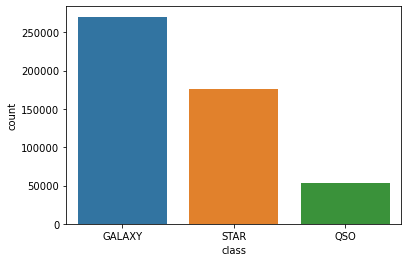

In [126]:
sns.countplot(x=skyObjData['class'],label="Count")

In [128]:
skyObjData['redshift_class'] = skyObjData['redshift'].apply(lambda x: True if x>=0 else False)

C:\Users\asus\AppData\Local\Temp/ipykernel_21640/3508656233.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skyObjData['redshift_class'] = skyObjData['redshift'].apply(lambda x: True if x>=0 else False)


In [129]:
skyObjData.groupby(['class', 'redshift_class']).redshift.agg(['count'])

count
class  redshift_class        
GALAXY False              138
       True            270294
QSO    True             53182
STAR   False           113045
       True             63341

<AxesSubplot:xlabel='class,redshift_class'>

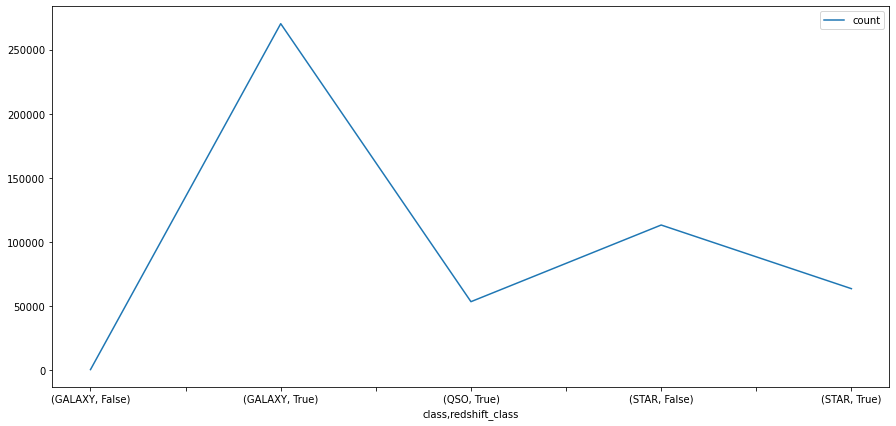

In [130]:
fig, ax = plt.subplots(figsize=(15,7))
skyObjData.groupby(['class', 'redshift_class']).redshift.agg(['count']).plot(ax=ax)
# True=>redshift & False=>blueshift

In [131]:
whos

Variable                         Type                      Data/Info
--------------------------------------------------------------------
AdaBoostClassifier               ABCMeta                   <class 'sklearn.ensemble.<...>ting.AdaBoostClassifier'>
BaggingClassifier                ABCMeta                   <class 'sklearn.ensemble.<...>gging.BaggingClassifier'>
BernoulliNB                      ABCMeta                   <class 'sklearn.naive_bayes.BernoulliNB'>
DecisionTreeClassifier           ABCMeta                   <class 'sklearn.tree._cla<...>.DecisionTreeClassifier'>
ExtraTreesClassifier             ABCMeta                   <class 'sklearn.ensemble.<...>st.ExtraTreesClassifier'>
GaussianNB                       ABCMeta                   <class 'sklearn.naive_bayes.GaussianNB'>
GradientBoostingClassifier       ABCMeta                   <class 'sklearn.ensemble.<...>dientBoostingClassifier'>
KNeighborsClassifier             ABCMeta                   <class 'sklearn.neighbors<.

skyObjData                       DataFrame                                       ra <...>500000 rows x 21 columns]
sns                              module                    <module 'seaborn' from 'D<...>s\\seaborn\\__init__.py'>
supportBag                       NoneType                  None
supportBnb                       NoneType                  None
supportDtree                     NoneType                  None
supportGnb                       NoneType                  None
supportKNN                       NoneType                  None
supportLr                        NoneType                  None
supportSvc                       NoneType                  None
svcConfusionMatrix               ndarray                   3x3: 9 elems, type `int64`, 72 bytes
svcTestAccuracy                  float64                   93.41
svcTrainAccuracy                 float64                   93.52
targetCount                      Series                    GALAXY    270432\nSTAR   <...>Name: c

<AxesSubplot:xlabel='ra', ylabel='dec'>

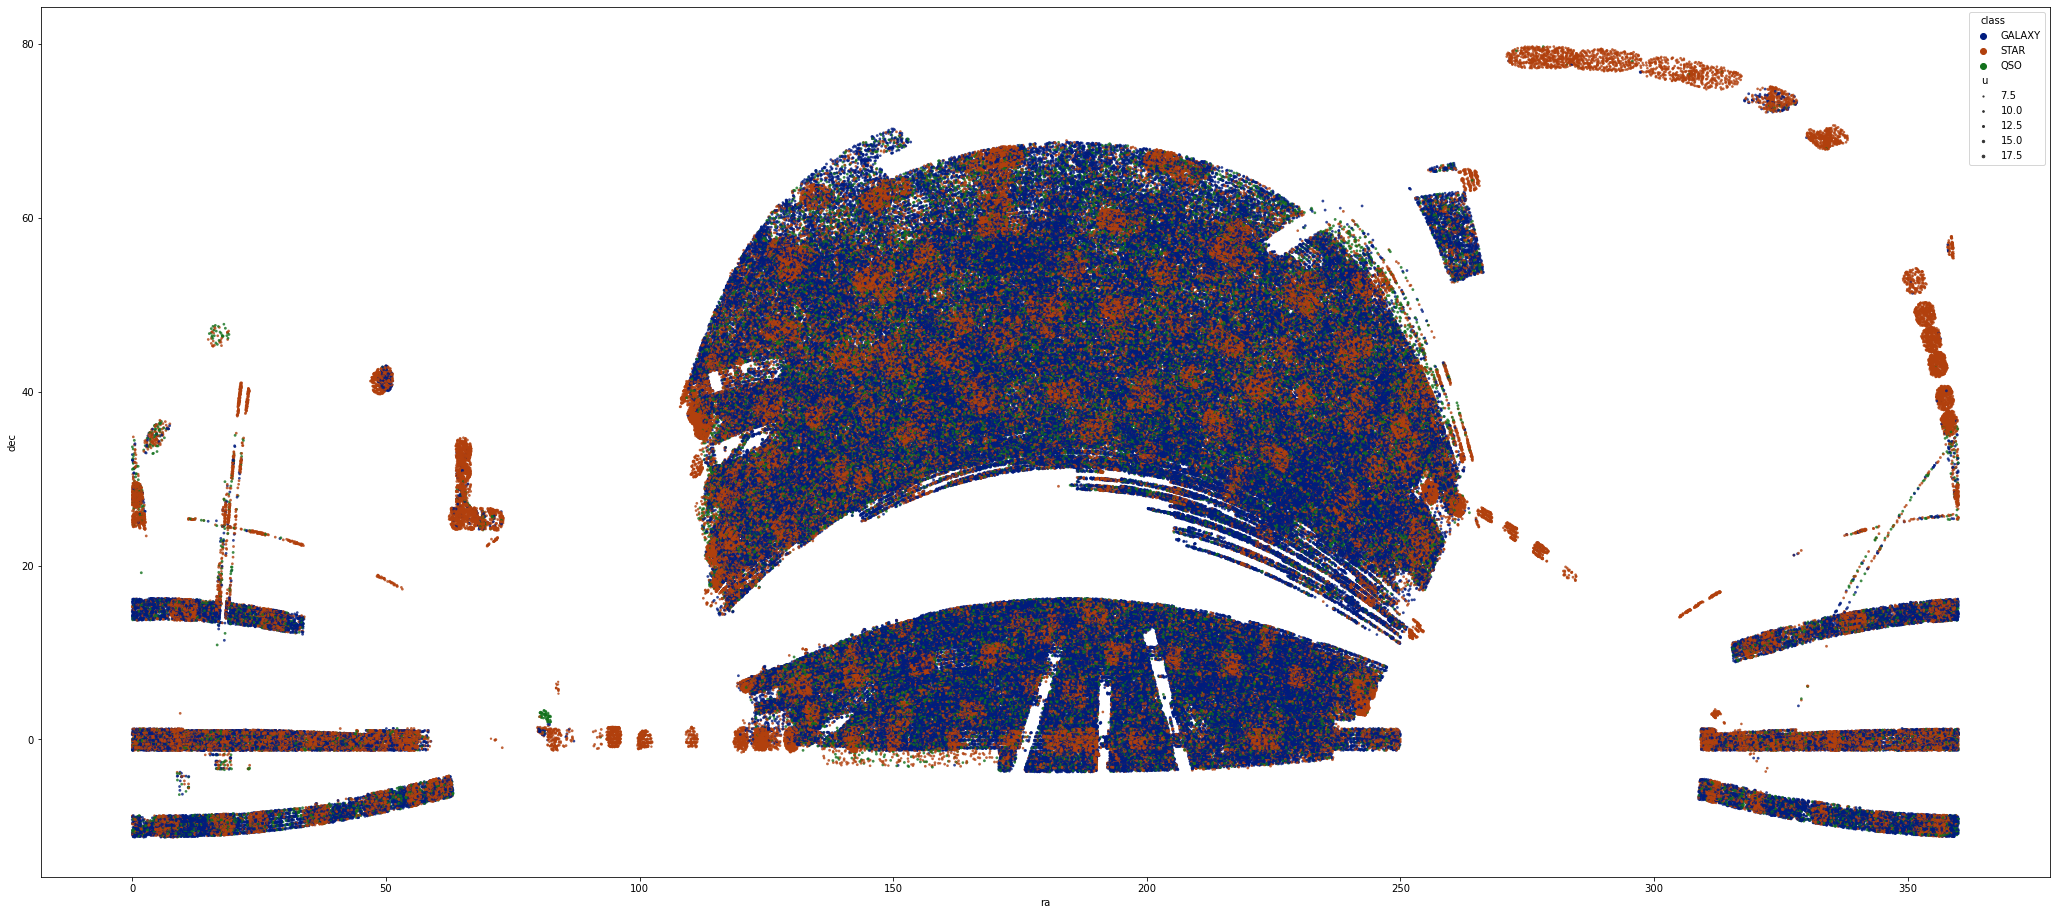

In [132]:
# distribution of astronomical objects via dec & ra
plt.figure(figsize=(36, 16))
sns.scatterplot(x="ra", y="dec",
                hue="class", alpha=0.8, size="u",
                palette='dark', 
                sizes=(1, 8), linewidth=0,
                data=skyObjData)

In [21]:
# plt.figure(figsize = (15,7))
# sns.pairplot(skyObjData[['class', 'u', 'g', 'r', 'i', 'z', 'modelFlux_u', 'modelFlux_g', 'modelFlux_r', 'modelFlux_i', 'modelFlux_z']], hue='class')

In [22]:
# plt.figure(figsize = (15,7))
# sns.pairplot(skyObjData[['class', 'run', 'rerun', 'camcol', 'field', 'plate', 'mjd']], hue='class')

## Feature Engineering

In [133]:
# limiting outlier values

# need to check this part

#skyObjData[['i','z']] = skyObjData[['i','z']].clip(5,33)

In [134]:
# Colour Indexes-difference between the two spectrum range
skyObjData['color_u_g'] = skyObjData['u'] - skyObjData['g']
skyObjData['color_g_r'] = skyObjData['g'] - skyObjData['r']
skyObjData['color_r_i'] = skyObjData['r'] - skyObjData['i']
skyObjData['color_i_z'] = skyObjData['i'] - skyObjData['z']

In [135]:
skyObjData[['u', 'g', 'r', 'i', 'z', 'color_u_g', 'color_g_r', 'color_r_i', 'color_i_z']].head()

,u,g,r,i,z,color_u_g,color_g_r,color_r_i,color_i_z
objid,,,,,,,,,
1.237650e+18,19.00423,16.77978,15.78668,15.31252,14.92504,2.22445,0.99310,0.47416,0.38748
1.237650e+18,19.25452,18.21714,17.73826,17.37833,17.24885,1.03738,0.47888,0.35993,0.12948
1.237650e+18,19.11886,18.11232,17.60778,17.20081,17.10747,1.00654,0.50454,0.40697,0.09334
1.237650e+18,17.79247,16.65809,16.22427,15.88969,15.71684,1.13438,0.43382,0.33458,0.17285
1.237650e+18,18.98048,17.93086,17.53560,17.38974,17.29787,1.04962,0.39526,0.14586,0.09187


In [136]:
# conversions because the range of flux features are too wide
# 1 nanomaggies = 3.631 * 10^-6 Jansky ==> Jansky is a non-SI unit of spectral flux density
# 1js = 10^-26 W*m^-2*Hz^-1

cols = skyObjData.iloc[:, 11:16]
for i in cols:
    skyObjData[i] = skyObjData[i] * 3.631*(10**-6)

skyObjData.iloc[:, 11:16].describe()

,modelFlux_u,modelFlux_g,modelFlux_r,modelFlux_i,modelFlux_z
count,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000
mean,0.000225,0.000760,0.001367,0.001796,0.002074
std,0.010872,0.007132,0.009916,0.013371,0.018469
min,0.000052,0.000036,-0.001005,-0.001024,-0.004337
25%,0.000071,0.000217,0.000336,0.000421,0.000467
50%,0.000102,0.000353,0.000622,0.000816,0.000959
75%,0.000186,0.000652,0.001192,0.001616,0.002021
max,7.228239,3.743067,1.514870,3.156607,9.242554


In [137]:
# log transformation to decrease the effect of the outliers

skyObjData['logRedshift'] = (skyObjData['redshift']+1).transform(np.log)

In [138]:
# Encode target

objects = {"STAR": 0, "GALAXY": 1, "QSO": 2}
skyObjData['class'] = skyObjData['class'].map(objects)

In [139]:
skyObjData.describe()

,ra,dec,u,g,r,i,z,run,rerun,camcol,...,modelFlux_z,redshift,plate,mjd,class,color_u_g,color_g_r,color_r_i,color_i_z,logRedshift
count,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.0,500000.000000,...,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000
mean,184.883287,26.993610,18.642071,17.416536,16.891576,16.593550,16.394705,3161.838304,301.0,3.493276,...,0.002074,0.172462,2227.048788,53623.901124,0.753592,1.225536,0.524959,0.298027,0.198845,0.119760
std,69.327689,20.892019,0.829097,0.984960,1.132459,20.067806,28.357076,1090.979194,0.0,1.593426,...,0.018469,0.433437,2054.014340,1477.028289,0.631205,0.528009,0.340319,20.032242,28.328127,0.245661
min,0.002795,-11.252825,6.752484,7.466997,8.449127,-9999.000000,-9999.000000,94.000000,301.0,1.000000,...,-0.004337,-0.004268,266.000000,51578.000000,0.000000,-6.963016,-14.784580,-15.859360,-10013.264930,-0.004277
25%,146.617060,7.229103,18.224177,16.863850,16.209238,15.878837,15.636038,2305.000000,301.0,2.000000,...,0.000467,0.000037,954.000000,52577.000000,0.000000,0.974920,0.324710,0.146200,0.050660,0.000037
50%,186.532990,29.631464,18.873805,17.531045,16.916115,16.620505,16.445845,3530.000000,301.0,4.000000,...,0.000959,0.051079,1676.000000,53228.000000,1.000000,1.233790,0.535990,0.286490,0.158350,0.049817
75%,225.418842,43.801855,19.271110,18.060380,17.585532,17.338830,17.225795,3927.000000,301.0,5.000000,...,0.002021,0.097835,2558.000000,54509.000000,1.000000,1.572440,0.763410,0.399073,0.283190,0.093340
max,359.998882,79.742295,19.600000,19.996050,33.209920,32.349170,30.846780,4858.000000,301.0,6.000000,...,9.242554,7.011245,11704.000000,58543.000000,2.000000,6.060500,5.553990,10016.920000,10016.604430,2.080846


In [140]:
# Reorder columns

skyObjData=skyObjData[['class', 'u', 'g', 'r', 'i', 'z',
        'modelFlux_u', 'modelFlux_g', 'modelFlux_r', 'modelFlux_i', 'modelFlux_z',
        'color_u_g', 'color_g_r', 'color_r_i','color_i_z', 
        'logRedshift','ra', 'dec', 'redshift','redshift_class',
        'rerun', 'camcol', 'field','plate', 'mjd']]
skyObjData.head()

,class,u,g,r,i,z,modelFlux_u,modelFlux_g,modelFlux_r,modelFlux_i,...,logRedshift,ra,dec,redshift,redshift_class,rerun,camcol,field,plate,mjd
objid,,,,,,,,,,,,,,,,,,,,,
1.237650e+18,1,19.00423,16.77978,15.78668,15.31252,14.92504,0.000091,0.000705,0.001759,0.002723,...,0.068553,232.599355,-0.338963,0.070957,True,301,3,595,363,51989
1.237650e+18,1,19.25452,18.21714,17.73826,17.37833,17.24885,0.000072,0.000188,0.000292,0.000406,...,0.116994,335.122597,12.189079,0.124113,True,301,1,140,736,52221
1.237650e+18,1,19.11886,18.11232,17.60778,17.20081,17.10747,0.000082,0.000207,0.000329,0.000478,...,0.076496,335.049940,12.079281,0.079498,True,301,1,139,736,52221
1.237650e+18,1,17.79247,16.65809,16.22427,15.88969,15.71684,0.000277,0.000788,0.001176,0.001600,...,0.063460,334.505900,12.006364,0.065516,True,301,1,136,736,52221
1.237650e+18,0,18.98048,17.93086,17.53560,17.38974,17.29787,0.000093,0.000244,0.000351,0.000402,...,-0.000661,334.587293,12.126135,-0.000661,False,301,1,136,736,52221


## Training

In [142]:
from sklearn.model_selection import train_test_split, cross_validate

In [141]:
# Basic validation: splitting the data 60 - 20 - 20 train/val/test
# Utilize holdout data at the end for the most efficient algorithm

X_tr, X_holdout, y_tr, y_holdout = train_test_split(skyObjData.iloc[:, 1:18], skyObjData.loc[:, 'class'], test_size=0.2,random_state=76)
X_train, X_test, y_train, y_test = train_test_split(X_tr, y_tr, test_size=.25, random_state=76)

X_train.shape # shape of my train set

(300000, 17)

In [143]:
X_test.shape # shape of test data

(100000, 17)

In [144]:
X_holdout.shape

(100000, 17)

In [145]:
def plotConfusionMatrixDF(cnf):
    cnfDf = pd.DataFrame(cnf, index=['Galaxy','Star','Quasar'], columns=['Galaxy','Star','Quasar'])
    #Plotting the confusion matrix
    plt.figure(figsize=(5,4))
    sns.heatmap(cnfDf, annot=True, fmt='')
    plt.title('Confusion Matrix')
    plt.ylabel('Actal Values')
    plt.xlabel('Predicted Values')
    plt.show()

In [148]:
comparisonColumns = ['Model','Training Accuracy','Testing Accuracy','Precision','Recall','F1 Score']

In [149]:
comparisonData = []

In [214]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import (BaggingClassifier, RandomForestClassifier,AdaBoostClassifier, GradientBoostingClassifier)

In [182]:
#This functions takes input as model, train data and returns predicted value of dependent variable
def model(model, modelName, X_train, y_train):
    model.fit(X_train,y_train)
    classPrediction = model.predict(X_test)
    trainAccuracy = round(model.score(X_train,y_train)*100,2)
    testAccuracy = round(accuracy_score(y_test,classPrediction)*100,2)
    precision, recall, f1score, support = score(y_test, classPrediction, average='macro')
    comparisonData.append([modelName,trainAccuracy,testAccuracy,precision,recall,f1score])
    return classPrediction

## Logistic Regression

D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


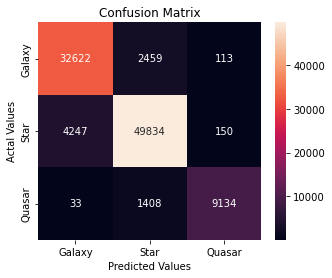

In [183]:
logisticRegression = LogisticRegression()
classPredictionLr=model(logisticRegression, 'Logistic Regression', X_train, y_train)
lrConfusionMatrix = confusion_matrix(y_test,classPredictionLr)
plotConfusionMatrixDF(lrConfusionMatrix)

## Naive Bayes

### GaussianNB 


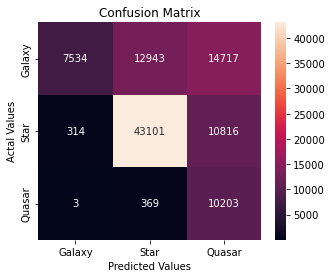

In [185]:
gaussianNB = GaussianNB()
gnbPrediction=model(gaussianNB, 'GaussianNB', X_train, y_train)
gnbConfusionMatrix = confusion_matrix(y_test,gnbPrediction)
plotConfusionMatrixDF(gnbConfusionMatrix)

### Bernoulli NB

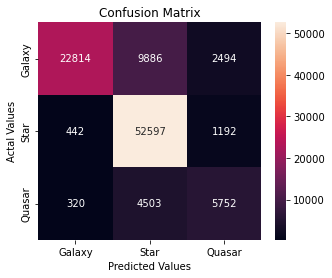

In [186]:
bernoulliNB = BernoulliNB()
bnbPrediction=model(bernoulliNB, 'BernoulliNB', X_train, y_train)
bnbConfusionMatrix = confusion_matrix(y_test,bnbPrediction)
plotConfusionMatrixDF(bnbConfusionMatrix)

## Linear SVC

D:\Anaconda\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


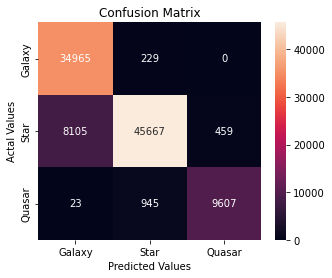

In [198]:
linearSVC = LinearSVC()
classPredictionSVC=model(linearSVC, 'Linear SVC', X_train, y_train)
svcConfusionMatrix = confusion_matrix(y_test,classPredictionSVC)
plotConfusionMatrixDF(svcConfusionMatrix)

## Decision Tree

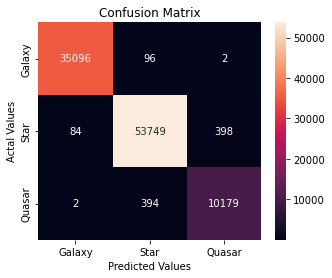

In [226]:
dtree = DecisionTreeClassifier()
classPredictionTree=model(dtree, 'Decision Tree', X_train, y_train)
dtreeConfusionMatrix = confusion_matrix(y_test,classPredictionTree)
plotConfusionMatrixDF(dtreeConfusionMatrix)

## KNN

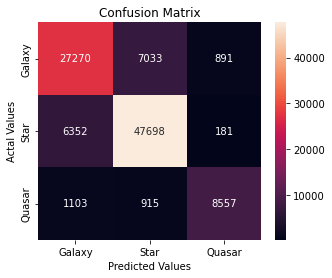

In [228]:
knn=KNeighborsClassifier(n_neighbors=5)
classPredictionKNN=model(knn, 'KNN', X_train, y_train)
knnConfusionMatrix = confusion_matrix(y_test,classPredictionKNN)
plotConfusionMatrixDF(knnConfusionMatrix)

In [229]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [ ]:
classPredictionKNN = knn.predict(X_test)

In [ ]:
knnTrainAccuracy = round(dtree.score(X_train,y_train)*100,2)
print("Training Score : ",knnTrainAccuracy)

In [ ]:
knnTestAccuracy = round(accuracy_score(y_test,classPredictionKNN)*100,2)
print("Testing Score: ",knnTestAccuracy)

In [ ]:
precisionKNN, recallKNN, f1scoreKNN, supportKNN = score(y_test, classPredictionKNN, average='macro')
print(f'Precision : {precisionKNN}')
print(f'Recall    : {recallKNN}')
print(f'F1-score   : {f1scoreKNN}')

In [ ]:
comparisonData.append(['KNN',knnTrainAccuracy,knnTestAccuracy,precisionKNN,recallKNN,f1scoreKNN])

In [ ]:
knnConfusionMatrix = confusion_matrix(y_test,classPredictionKNN)
knnConfusionMatrix

In [ ]:
plotConfusionMatrixDF(knnConfusionMatrix)

## Bagging Algorithms

### Bagging Classifier

In [98]:
from sklearn.ensemble import (RandomForestClassifier, ExtraTreesClassifier, VotingClassifier, 
                              AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier)

In [ ]:
baggingClassifier = BaggingClassifier(base_estimator=dtree, n_estimators=100,bootstrap=True, n_jobs=-1, random_state=7)
classPredictionBag=model(baggingClassifier, 'Bagging Classifier', X_train, y_train)
bagConfusionMatrix = confusion_matrix(y_test,classPredictionBag)
plotConfusionMatrixDF(bagConfusionMatrix)

In [ ]:
baggingClassifierLR = BaggingClassifier(base_estimator=logisticRegression, n_estimators=100,bootstrap=True, n_jobs=-1, random_state=7)
classPredictionBagLR=model(baggingClassifierLR, 'Bagging Classifier', X_train, y_train)
bagConfusionMatrixLR = confusion_matrix(y_test,classPredictionBagLR)
plotConfusionMatrixDF(bagConfusionMatrixLR)

In [99]:
bagging_classifier = BaggingClassifier(base_estimator=dtree, n_estimators=100,
    bootstrap=True, n_jobs=-1, random_state=7)

In [100]:
bagging_classifier.fit(X_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100,
                  n_jobs=-1, random_state=7)

In [101]:
classPredictionBag = bagging_classifier.predict(X_test)

In [102]:
baggingClassifierTrainAccuracy = round(bagging_classifier.score(X_train,y_train)*100,2)
print("Training Score : ",baggingClassifierTrainAccuracy)

Training Score :  100.0


In [103]:
baggingClassifierTestAccuracy = round(accuracy_score(y_test,classPredictionBag)*100,2)
print("Testing Score: ",baggingClassifierTestAccuracy)

Testing Score:  99.4


In [104]:
precisionBag, recallBag, f1scoreBag, supportBag = score(y_test, classPredictionBag, average='macro')
print(f'Precision : {precisionBag}')
print(f'Recall    : {recallBag}')
print(f'F1-score   : {f1scoreBag}')

Precision : 0.9924565287177657
Recall    : 0.9870512553226823
F1-score   : 0.9897168479623968


In [105]:
comparisonData.append(['BaggingClassifier',baggingClassifierTrainAccuracy,baggingClassifierTestAccuracy,precisionBag,recallBag,f1scoreBag])

In [106]:
bagConfusionMatrix = confusion_matrix(y_test,classPredictionBag)
bagConfusionMatrix

array([[35154,    39,     1],
       [   66, 54027,   138],
       [    2,   357, 10216]], dtype=int64)

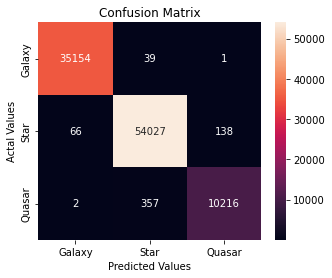

In [107]:
plotConfusionMatrixDF(bagConfusionMatrix)

### Random Forest Classifier 

In [108]:
from sklearn.ensemble import RandomForestClassifier

In [109]:
randomForestClassifier = RandomForestClassifier(n_estimators=100)
classPredictionRandomForest=model(randomForestClassifier, 'Random Forest Classifier', X_train, y_train)
randomForestConfusionMatrix = confusion_matrix(y_test,classPredictionRandomForest)
plotConfusionMatrixDF(randomForestConfusionMatrix)

In [ ]:
randomForestClassifierLessEstimators = RandomForestClassifier(n_estimators=75)
classPredictionRandomForestLessEstimator=model(randomForestClassifierLessEstimators, 'Random Forest Classifier', X_train, y_train)
randomForestConfusionMatrixLessEstimator = confusion_matrix(y_test,classPredictionRandomForestLessEstimator)
plotConfusionMatrixDF(randomForestConfusionMatrixLessEstimator)

In [110]:
randomForestClassifier.fit(X_train,y_train)

RandomForestClassifier()

In [111]:
classPredictionRandomForest = randomForestClassifier.predict(X_test)

In [162]:
randomForestClassifierTrainAccuracy = round(randomForestClassifier.score(X_train,y_train)*100,2)
print("Training Score : ",randomForestClassifierTrainAccuracy)

Training Score :  100.0


In [163]:
randomForestClassifierTestAccuracy = round(accuracy_score(y_test,classPredictionRandomForest)*100,2)
print("Testing Score: ",randomForestClassifierTestAccuracy)

Testing Score:  99.37


In [164]:
precisionRandomForest, recallRandomForest, f1scoreRandomForest, supportRandomTree = score(y_test, classPredictionBag, average='macro')
print(f'Precision : {precisionRandomForest}')
print(f'Recall    : {recallRandomForest}')
print(f'F1-score   : {f1scoreRandomForest}')

Precision : 0.9924565287177657
Recall    : 0.9870512553226823
F1-score   : 0.9897168479623968


In [165]:
comparisonData.append(['RandomForestClassifier',randomForestClassifierTrainAccuracy,randomForestClassifierTestAccuracy,precisionRandomForest,recallRandomForest,f1scoreRandomForest])

In [166]:
randomForestConfusionMatrix = confusion_matrix(y_test,classPredictionRandomForest)
randomForestConfusionMatrix

array([[35152,    42,     0],
       [  101, 53995,   135],
       [    8,   347, 10220]], dtype=int64)

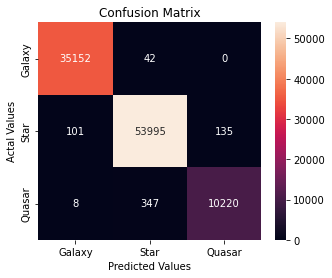

In [167]:
plotConfusionMatrixDF(randomForestConfusionMatrix)

## Boosting Algorithms 

### AdaBoost Classifier

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
adaBoostclassifier = AdaBoostClassifier(base_estimator=dtree, n_estimators=100, random_state = 7)
classPredictionAdaBoost=model(adaBoostclassifier, 'Ada Boost Classifier', X_train, y_train)
adaBoostConfusionMatrix = confusion_matrix(y_test,classPredictionAdaBoost)
plotConfusionMatrixDF(adaBoostConfusionMatrix)

In [ ]:
adaBoostclassifier.fit(X_train,y_train)

In [ ]:
classPredictionAdaBoost = adaBoostclassifier.predict(X_test)

In [ ]:
adaBoostClassifierTrainAccuracy = round(adaBoostclassifier.score(X_train,y_train)*100,2)
print("Training Score : ",adaBoostClassifierTrainAccuracy)

In [ ]:
adaBoostClassifierTestAccuracy = round(accuracy_score(y_test,classPredictionAdaBoost)*100,2)
print("Testing Score: ",adaBoostClassifierTestAccuracy)

In [ ]:
precisionAdaBoost, recallAdaBoost, f1scoreAdaBoost, supportAdaBoost = score(y_test, classPredictionAdaBoost, average='macro')
print(f'Precision : {precisionAdaBoost}')
print(f'Recall    : {recallAdaBoost}')
print(f'F1-score   : {f1scoreAdaBoost}')

In [ ]:
comparisonData.append(['AdaBoostClassifier',adaBoostClassifierTrainAccuracy,adaBoostClassifierTestAccuracy,precisionAdaBoost,recallAdaBoost,f1scoreAdaBoost])

In [ ]:
adaBoostConfusionMatrix = confusion_matrix(y_test,classPredictionAdaBoost)
adaBoostConfusionMatrix

In [ ]:
plotConfusionMatrixDF(adaBoostConfusionMatrix)

### Gradient Boosting Classification

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
gradientBoostClassifier = GradientBoostingClassifier(n_estimators=100, learning_rate=0.01, random_state=7)
classPredictionGradientBoost=model(gradientBoostClassifier, 'Gradient Boost Classifier', X_train, y_train)
gradientBoostConfusionMatrix = confusion_matrix(y_test,classPredictionGradientBoost)
plotConfusionMatrixDF(gradientBoostConfusionMatrix)

In [ ]:
gradientBoostClassifier.fit(X_train,y_train)

In [ ]:
classPredictionGradientBoost = gradientBoostClassifier.predict(X_test)

In [ ]:
gradientBoostClassifierTrainAccuracy = round(gradientBoostClassifier.score(X_train,y_train)*100,2)
print("Training Score : ",gradientBoostClassifierTrainAccuracy)

In [ ]:
gradientBoostClassifierTestAccuracy = round(accuracy_score(y_test,classPredictionGradientBoost)*100,2)
print("Testing Score: ",gradientBoostClassifierTestAccuracy)

In [ ]:
precisionGradientBoost, recallGradientBoost, f1scoreGradientBoost, supportGradientBoost = score(y_test, classPredictionGradientBoost, average='macro')
print(f'Precision : {precisionGradientBoost}')
print(f'Recall    : {recallGradientBoost}')
print(f'F1-score   : {f1scoreGradientBoost}')

In [ ]:
comparisonData.append(['GradientBoostClassifier',gradientBoostClassifierTrainAccuracy,gradientBoostClassifierTestAccuracy,precisionGradientBoost,recallGradientBoost,f1scoreGradientBoost])

In [ ]:
gradientBoostConfusionMatrix = confusion_matrix(y_test,classPredictionGradientBoost)
gradientBoostConfusionMatrix

In [ ]:
plotConfusionMatrixDF(gradientBoostConfusionMatrix)

In [ ]:
# View feature importances
importances_dt = pd.DataFrame({'feature': X_train.columns,
                             'importance': dtree.feature_importances_})
importances_dt = importances_dt.sort_values('importance',ascending=False).set_index('feature')
importances_dt.head(17)

# Classifier Comparison

In [ ]:
comparisonDF = pd.DataFrame(comparisonData,columns=comparisonColumns)

In [ ]:
comparisonDF.sort_values('Testing Accuracy',inplace=True)
comparisonDF.reset_index(inplace=True)
comparisonDF.drop(columns=['index'],inplace=True)

In [ ]:
comparisonDF

In [ ]:
ax = sns.barplot(x="Model", y="Testing Accuracy", data=comparisonDF)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)

In [ ]:
ax = sns.barplot(x="Model", y="F1 Score", data=comparisonDF)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)

In [ ]:
## Tuning Gaussian NB
param_grid_nb = {
    'var_smoothing': np.logspace(0,-9, num=100)
}

In [ ]:
nbModel_grid = GridSearchCV(estimator=GaussianNB(), param_grid=param_grid_nb, verbose=1, cv=10, n_jobs=-1)
nbModel_grid.fit(X_train, y_train)
print(nbModel_grid.best_estimator_)
GaussianNB(priors=None, var_smoothing=1.0)
y_pred = nbModel_grid.predict(X_test)
testAccuracy = round(accuracy_score(y_test,y_pred)*100,2)
print("Testing Score: ",testAccuracy)
precision, recall, f1score, _ = score(y_test, y_pred, average='macro')
print(f'Precision : {precisionGradientBoost}')
print(f'Recall    : {recallGradientBoost}')
print(f'F1-score   : {f1scoreGradientBoost}')
comparisonColumnsTuning = ['Model','Testing Accuracy','Precision','Recall','F1 Score']
comparisonColumnsTuningData = []
comparisonColumnsTuningData.append([comparisonDF.iloc[0][0],comparisonDF.iloc[0][1],comparisonDF.iloc[0][2],comparisonDF.iloc[0][3], comparisonDF.iloc[0][4]])
comparisonColumnsTuningData.append(["Tuned GaussianNB",testAccuracy,precision,recall,f1score])
tuningDf = pd.DataFrame(comparisonColumnsTuningData,columns=comparisonColumnsTuning)
tuningDf